# Derived Quanities
## Create Model To Prediction a Derived Quanity Based on 3 Channel Single Timestep

In [1]:
import torch
from data_utils import DerivedQuanities, fast_loader
from models import DerivedCNN, train

train_dataset = DerivedQuanities("/Users/anthonypoole/Repositories/hw_snapshots.h5", start=16000, end=17000)
test_dataset = DerivedQuanities("/Users/anthonypoole/Repositories/hw_snapshots.h5", start=17000, end=17100)
train_loader = fast_loader(train_dataset)
test_loader = fast_loader(test_dataset)

model = DerivedCNN()
train(model=model, train_loader=train_loader, test_loader=test_loader, num_epochs=5)

# Save the model
torch.save(model.state_dict(), "DerivedCNN.pth")
print("Model saved as DerivedCNN.pth")

Training: 100%|██████████| 32/32 [01:09<00:00,  2.17s/it]
Evaluating: 4it [00:02,  1.68it/s]                       


Epoch 1/5, Train Loss: 10272.6274, Val Loss: 0.0112


Training: 100%|██████████| 32/32 [01:13<00:00,  2.30s/it]
Evaluating: 4it [00:02,  1.60it/s]                       


Epoch 2/5, Train Loss: 0.1531, Val Loss: 0.0031


Training: 100%|██████████| 32/32 [01:14<00:00,  2.32s/it]
Evaluating: 4it [00:02,  1.59it/s]                       


Epoch 3/5, Train Loss: 0.0800, Val Loss: 0.0156


Training: 100%|██████████| 32/32 [01:19<00:00,  2.48s/it]
Evaluating: 4it [00:02,  1.43it/s]                       


Epoch 4/5, Train Loss: 0.0904, Val Loss: 0.0529


Training: 100%|██████████| 32/32 [01:23<00:00,  2.62s/it]
Evaluating: 4it [00:02,  1.50it/s]                       


Epoch 5/5, Train Loss: 0.1247, Val Loss: 0.0925
Training completed!
Model saved as DerivedCNN.pth


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-22.119488..24.150677].


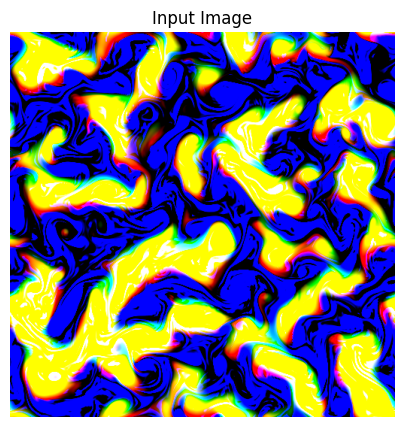

True Label: 0.610347
Predicted Label: 0.659027
----------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-21.66963..23.950382].


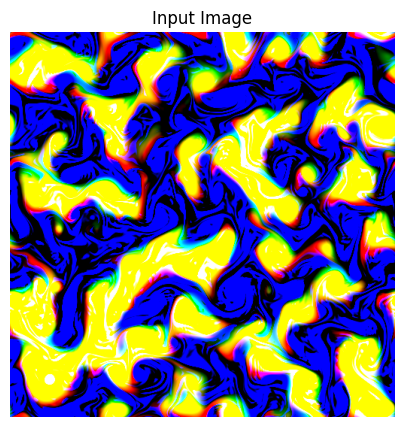

True Label: 0.567482
Predicted Label: 0.697830
----------------------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-21.940613..24.167791].


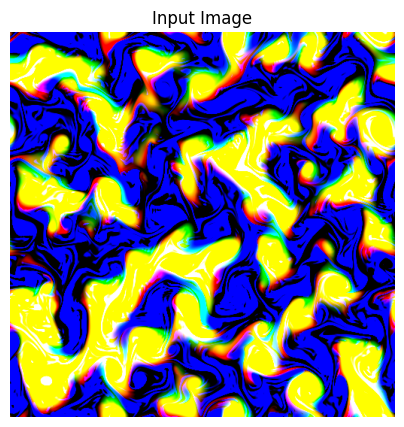

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-23.174313..24.318066].


True Label: 0.521049
Predicted Label: 0.716862
----------------------------------------


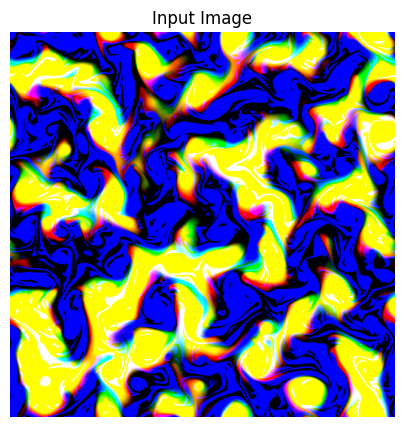

True Label: 0.544703
Predicted Label: 0.682827
----------------------------------------
Overall Accuracy: 0.00000000%


In [2]:
import matplotlib.pyplot as plt
import numpy as np

model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

for i, batch in enumerate(test_loader):
    images = batch['x'] 
    labels = batch['y']
    if i >= 5:
        break
    
    # Move tensors to the appropriate device
    images = images.to('cpu')
    labels = labels.to('cpu')
    
    # Forward pass
    outputs = model(images)
    predictions = outputs.detach().cpu().numpy()
    true_labels = labels.cpu().numpy()

    # Calculate accuracy for this batch
    correct += np.sum(np.isclose(predictions, true_labels, atol=0.0001))  # Example tolerance
    total += labels.size(0)
    
    # Plot the first example from the batch
    plt.figure(figsize=(5, 5))
    plt.imshow(images[0].cpu().numpy().transpose(1, 2, 0))
    plt.title("Input Image")
    plt.axis('off')
    plt.show()

    # Output true label and prediction as text
    print(f"True Label: {true_labels[0]:.6f}")
    print(f"Predicted Label: {predictions[0]:.6f}")
    print("-" * 40)

# Calculate and print overall accuracy
accuracy = correct / total
print(f"Overall Accuracy: {accuracy * 100:.8f}%")
